<a href="https://colab.research.google.com/github/gr-uzun/medical-cost-analysis/blob/main/medical_cost_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**@author :** Gürkan UZUN

**@since :** 2023.08.22

**@see :**
- https://www.kaggle.com/datasets/mirichoi0218/insurance
- https://www.kaggle.com/code/hely333/eda-regression
- https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
- https://www.kaggle.com/code/janiobachmann/patient-charges-clustering-and-regression
- https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

In this project, you will be trying to develop an end-to-end data science application using the dataset given above. The aim of the project is to estimate the approximate cost of a person's health insurance based on the given variables. While creating the project, try to follow the instructions below and make sure that the project is unique.

Creating a Google Colaboratory File
Make sure your project has .ipynb extension.
Make sure that there are comment lines explaining the details in your project.
When submitting the project, submit the cells of this .ipynb file so that the cells are run and the results are visible.

1. **Creating a Google Colaboratory File**
    - Make sure your project has .ipynb extension.
    - Make sure that there are comment lines explaining the details in your project.
    - When submitting the project, submit the cells of this .ipynb file so that the cells are
run and the results are visible.

2. **Importing Required Libraries**
    - Import the required libraries for the project to the Colab environment.
    - Import Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis

In [1]:
# Importing Required Libraries
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder # One-hot encoding a single column

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

**Read insurance.csv file and import dataset**

In [2]:
# Import dataset
path ='./dataset/'
df_insurance = pd.read_csv(path+'insurance.csv')

print('\nNumber of rows and columns in the data set: ',df_insurance.shape)
print('')

df_insurance.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. **Perform An Exploratory Data Analysis**
    - Analyze the data and draw meaningful conclusions from the data.
      - Examine the distribution of Bmi (Body Mass Index)
      - Examine the relationship between “smoker” and “charges”
      - Examine the relationship between “smoker” and “region”.
      - Examine the relationship between “bmi” and “sex”.
      - Find the "region" with the most "children".
      - Examine the relationship between “age” and “bmi”.
      - Examine the relationship between “bmi” and “children”.
      - Is there an outlier in the "bmi" variable? Please review.
      - Examine the relationship between “bmi” and “charges”.
      - Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

    - Try to use data visualization techniques as much as possible while examining the data.
    - Please add the meanings you deduced from the analyzes as a comment line.

In [3]:
df = df_insurance.copy()

In [4]:
# Examine the distribution of Bmi (Body Mass Index)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [8]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

<ipython-input-8-4bd61155b3f9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0.5, 1.0, 'Violin plot of Charges vs Smoker')

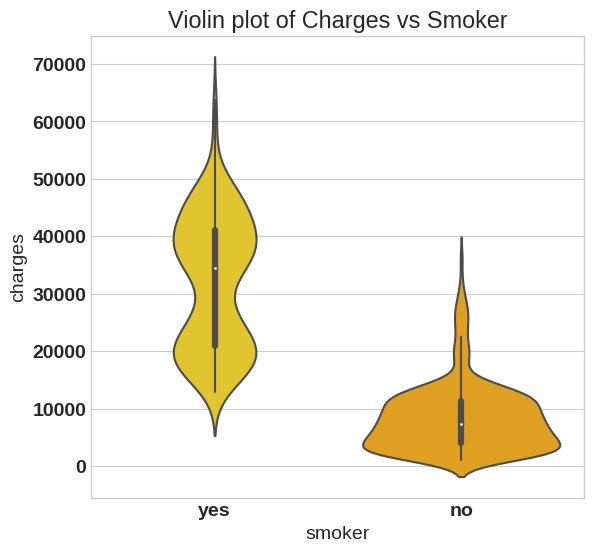

In [9]:
# Examine the relationship between “smoker” and “charges”

# Comments
# It shows the distribution of quantitative data(charges) across several levels of one (or more) categorical variables(smoker) such that those distributions can be compared.

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='smoker', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs Smoker')

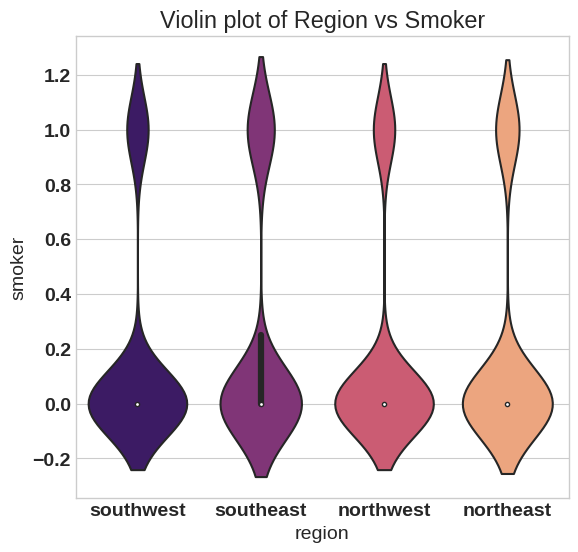

In [10]:
# Examine the relationship between “smoker” and “region”.

# Comments
# It shows the distribution of quantitative data(region) across several levels of one (or more) categorical variables(smoker) such that those distributions can be compared.
# It is hard to plot of relation between two string type categorical data.Smoker data must be converted to labeled or int type.

df2 = df.copy()
le = LabelEncoder()

# smoker or not
le.fit(df2.smoker.drop_duplicates())
df2.smoker = le.transform(df.smoker)

#df2['smoker'] = df2['smoker'].map({'yes': 1, 'no': 0})

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='region', y='smoker',data=df2,palette='magma',ax=ax)
ax.set_title('Violin plot of Region vs Smoker');


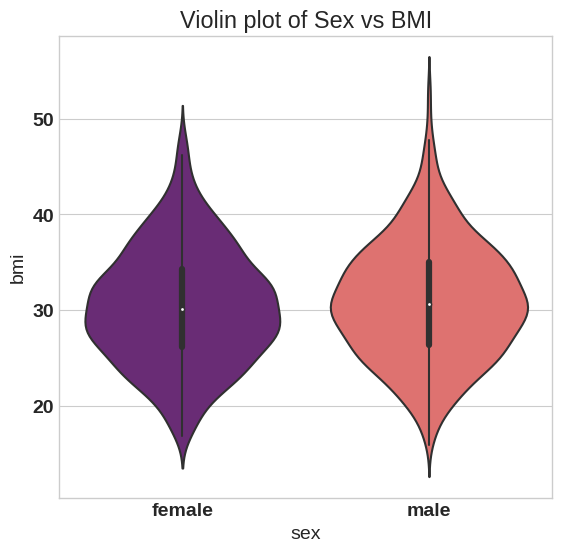

In [11]:
# Examine the relationship between “bmi” and “sex”

# Comments
# It shows the distribution of quantitative data(BMI) across several levels of one (or more) categorical variables(sex) such that those distributions can be compared.

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='bmi',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Sex vs BMI');

In [12]:
# Find the "region" with the most "children".

# Comments
# According to table below;
# southeast region has max number of children (364)

df.groupby('region').agg(['mean','min','max','count'])['children']

<ipython-input-12-96fcb7249ca5>:7: FutureWarning: ['sex', 'smoker'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('region').agg(['mean','min','max','count'])['children']


,mean,min,max,count
region,,,,
northeast,1.046296,0,5,324
northwest,1.147692,0,5,325
southeast,1.049451,0,5,364
southwest,1.141538,0,5,325


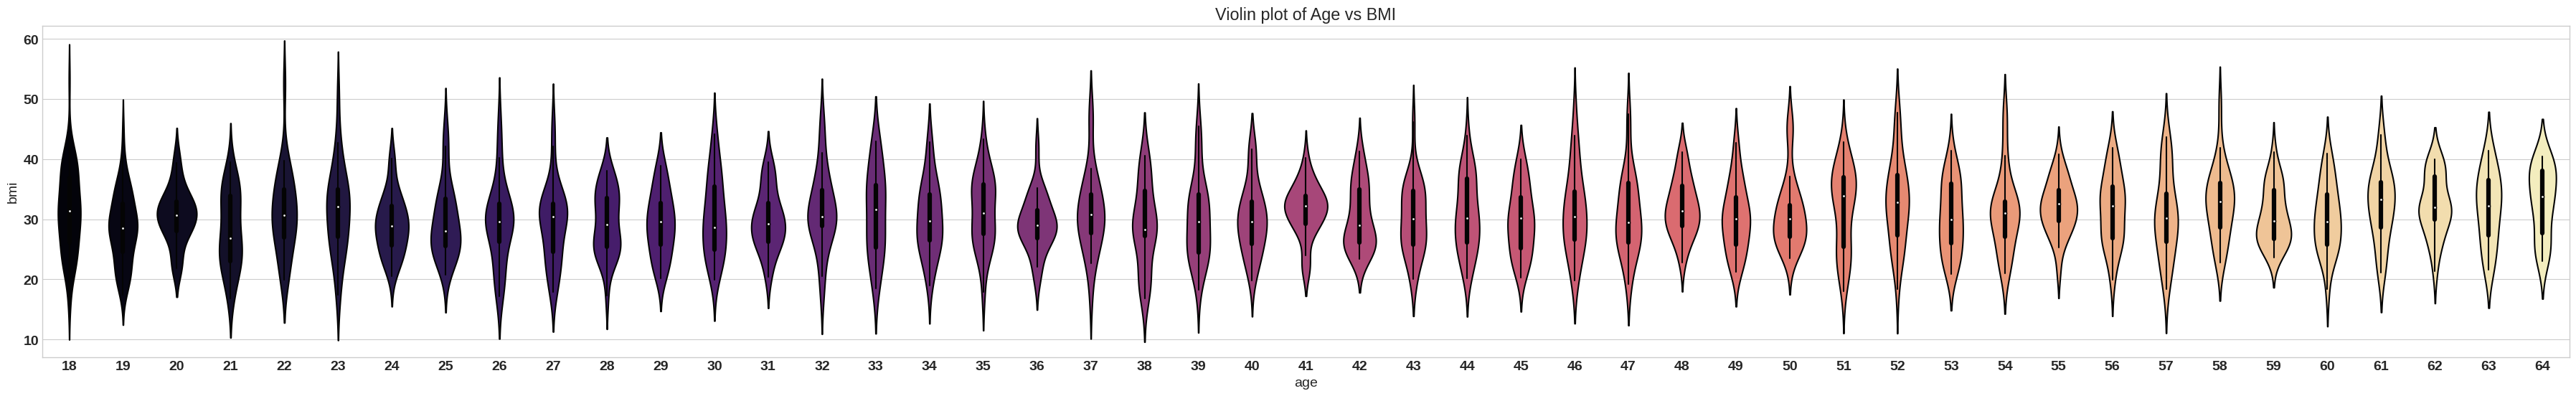

In [13]:
# Examine the relationship between “age” and “bmi”.

# Comments
# It shows the distribution of quantitative data(BMI) across several levels of one (or more) categorical variables(age) such that those distributions can be compared.

f = plt.figure(figsize=(100,6))
ax = f.add_subplot(121)
sns.violinplot(x='age', y='bmi',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Age vs BMI');


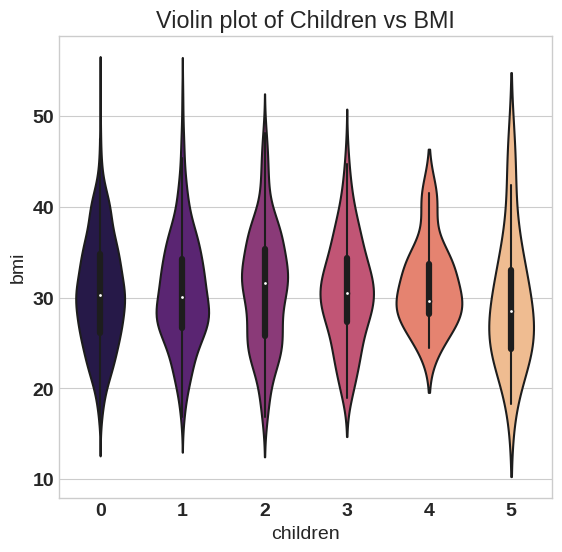

In [14]:
# Examine the relationship between “bmi” and “children”.

# Comments
# It shows the distribution of quantitative data(BMI) across several levels of one (or more) categorical variables(children) such that those distributions can be compared.

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='children', y='bmi',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Children vs BMI');

<Axes: xlabel='bmi'>

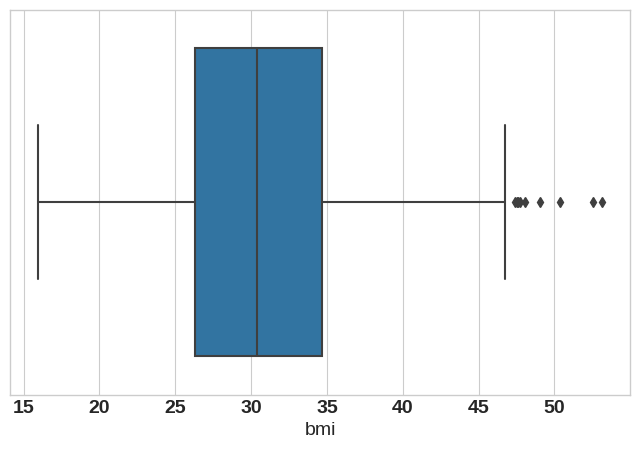

In [15]:
# Is there an outlier in the "bmi" variable? Please review.

# Comments
# Most of BMI values are between 25 and 35 , some BMI outliers values (approximitly 10 units) are over 45.

sns.boxplot(x='bmi',data=df)

<ipython-input-16-9e0b0efa6da9>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='bmi', y='charges',data=df,palette='magma',ax=ax)


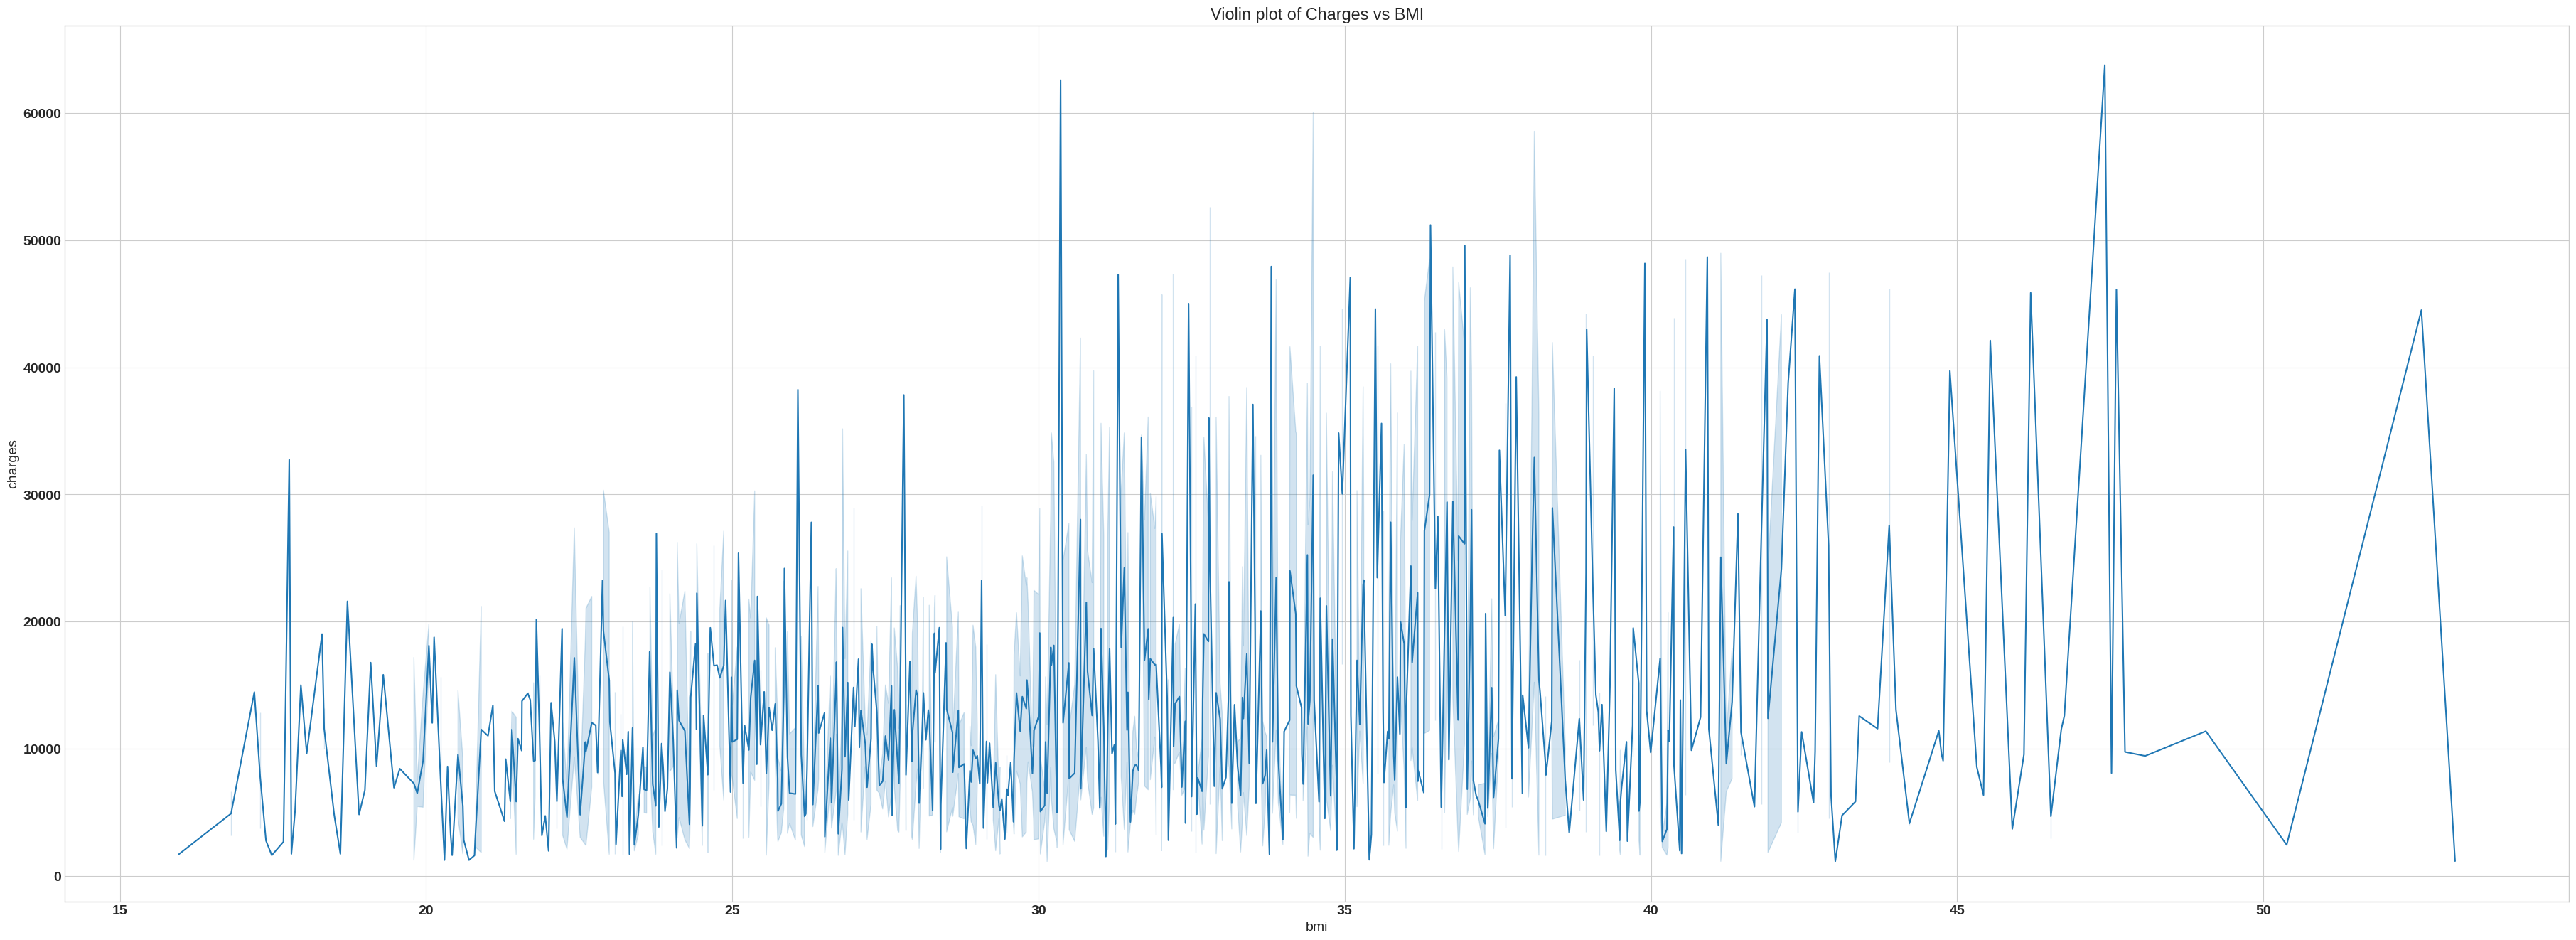

In [16]:
# Examine the relationship between “bmi” and “charges”.

# Comments
# The line plot graph shows the relationship between “bmi” and “charges” clearly

f = plt.figure(figsize=(100,16))
ax = f.add_subplot(121)
sns.lineplot(x='bmi', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs BMI');

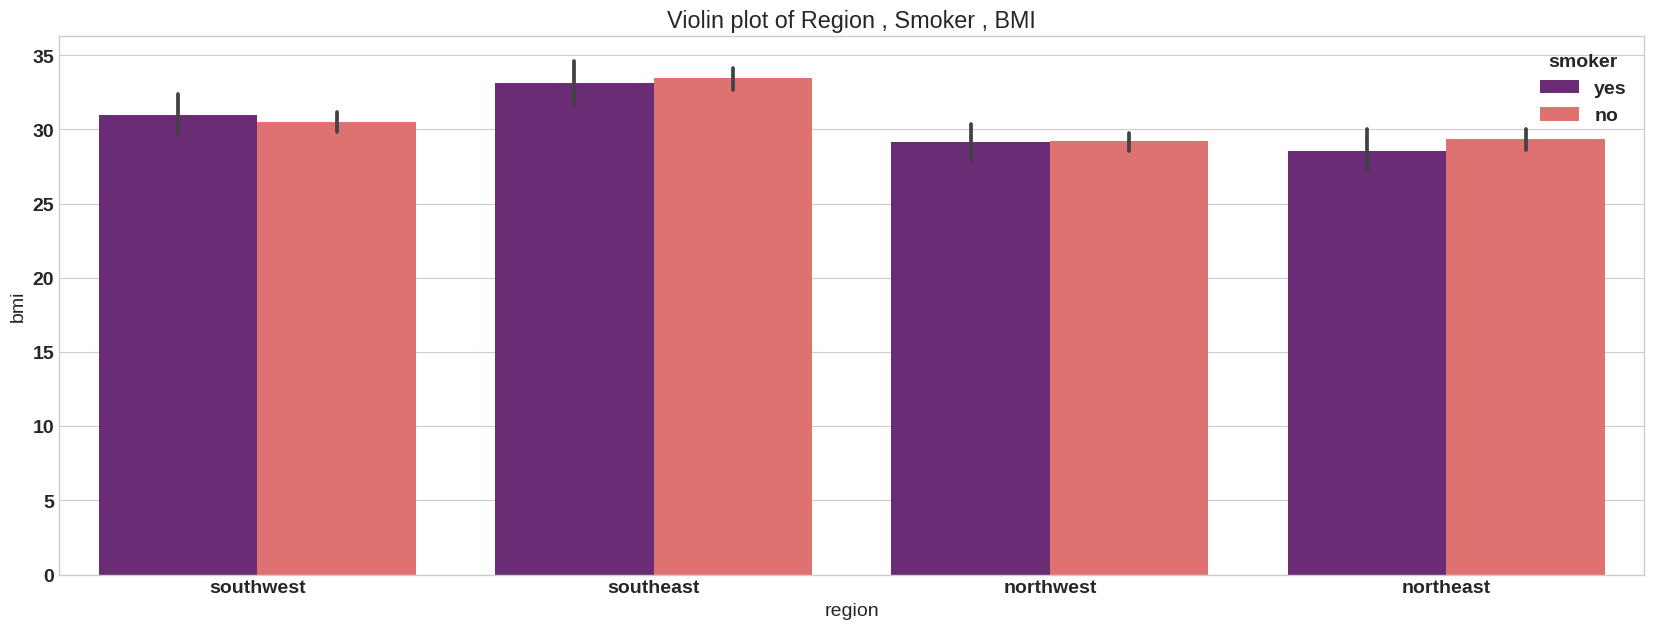

In [17]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

# Comments
# The bar plot graph shows the relationship between “region”, “smoker” and “bmi” clearly

f = plt.figure(figsize=(45,7))
ax = f.add_subplot(121)
sns.barplot(x='region', y='bmi',hue='smoker', data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Region , Smoker , BMI');

4. **Data Preprocessing**
    - In this section, prepare the data you have, for training the model.
    - Use Label Encoding and One-Hot Encoding techniques to deal with categorical
variables.
    - Split your dataset into X_train,X_test, y_train, y_test.
    - Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).

In [18]:
df_le = df_insurance.copy()

In [19]:
# Label Encoding

def label_encoding(column_name):
  label_encoder = LabelEncoder()
  # le.fit(df_le[column_name].drop_duplicates())
  df_le[column_name] = label_encoder.fit_transform(df[column_name])

In [20]:
# Label Encoding

# Comments
# For a start, we will encode categorical features.
# Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

label_encoding("smoker")

label_encoding("sex")

print('\nNumber of rows and columns in the data set: ',df_le.shape)
print('')

df_le.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [21]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
#one-hot encoding

one_hot = pd.get_dummies(df["region"])
one_hot.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [23]:
df_le = pd.concat([df_le, one_hot], axis=1)
df_le.drop("region", axis=1, inplace=True)
df_le.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [24]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [25]:
X = df_le.drop("charges", axis=1)
y = df_le["charges"]

In [26]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [27]:
# Split your dataset into X_train,X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [28]:
X_train.shape

(1070, 9)

In [29]:
X_test.shape

(268, 9)

In [30]:
y_train.shape

(1070,)

In [31]:
y_test.shape

(268,)

5. **Model Selection**
    - Select several regression models and train them with the preprocessed data.
    - Examine the performances of the selected models using cross validation.
    - Choose the best performing model

Select several regression models and train them with the preprocessed data.

In [32]:
# Creating models

linear_regression_model = LinearRegression()

ridge_model = Ridge() #L2

lasso_model = Lasso() #L1

random_forest_model = RandomForestRegressor(n_estimators = 100,
                                            criterion = 'friedman_mse',
                                            random_state = 1,
                                            n_jobs = -1)

decision_tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)

svr_model = SVR()

In [33]:
# Trainning models

linear_regression_model.fit(X_train,y_train)

ridge_model.fit(X_train,y_train)

lasso_model.fit(X_train,y_train)

random_forest_model.fit(X_train, y_train)

decision_tree_model.fit(X_train, y_train)

svr_model.fit(X_train, y_train)

SVR()

In [34]:
# Make prediction using the test dataset on Linear Regression model
linear_regression_y_pred = linear_regression_model.predict(X_test)

# Make prediction using the test dataset on Ridge model
ridge_y_pred = ridge_model.predict(X_test)

# Make prediction using the test dataset on Lasso model
lasso_y_pred = lasso_model.predict(X_test)

# Make prediction using the test dataset on Random Forest model
random_forest_y_pred = lasso_model.predict(X_test)

# Make prediction using the test dataset on Decision Tree model
decision_tree_y_pred = lasso_model.predict(X_test)

# Make prediction using the test dataset on SVR model
svr_y_pred = lasso_model.predict(X_test)

6. **Hyper-parameter Optimization**
    - Optimize the hyper-parameters of the model selected in the previous step.
    - Optimize parameters with Grid Search. (Grid Search or Randomized Search)

In [35]:
# Grid Search will be used for Ridge model

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['random_state'] = [True, False]

# define search
search = GridSearchCV(ridge_model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train, y_train)

print('result : ', result)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

ridge_grid_search_y_pred = result.predict(X_test)

result :  GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'random_state': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             scoring='neg_mean_absolute_error')
Best Score: -4235.428277948134
Best Hyperparameters: {'alpha': 1, 'fit_intercept': False, 'random_state': True, 'solver': 'sag'}


In [36]:
# Grid Search will be used for Random Forest model

params = {"n_estimators": [3, 10, 20, 50],
          "n_jobs": [2, 3, 4, 10]}

random_forest_grid_search = GridSearchCV(random_forest_model, params, cv=5, scoring="neg_mean_squared_error")

random_forest_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='friedman_mse',
                                             n_jobs=-1, random_state=1),
             param_grid={'n_estimators': [3, 10, 20, 50],
                         'n_jobs': [2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [37]:
random_forest_grid_search.best_params_

{'n_estimators': 50, 'n_jobs': 4}

In [38]:
for mean_score, params in zip((random_forest_grid_search.cv_results_['mean_test_score']), random_forest_grid_search.cv_results_["params"]):
  print(np.sqrt(-mean_score), "------------", params)

5522.270409202369 ------------ {'n_estimators': 3, 'n_jobs': 2}
5522.270409202369 ------------ {'n_estimators': 3, 'n_jobs': 3}
5522.270409202369 ------------ {'n_estimators': 3, 'n_jobs': 4}
5522.270409202369 ------------ {'n_estimators': 3, 'n_jobs': 10}
5107.65863860036 ------------ {'n_estimators': 10, 'n_jobs': 2}
5107.658638600361 ------------ {'n_estimators': 10, 'n_jobs': 3}
5107.658638600361 ------------ {'n_estimators': 10, 'n_jobs': 4}
5107.658638600361 ------------ {'n_estimators': 10, 'n_jobs': 10}
5017.985185539069 ------------ {'n_estimators': 20, 'n_jobs': 2}
5017.985185539069 ------------ {'n_estimators': 20, 'n_jobs': 3}
5017.985185539069 ------------ {'n_estimators': 20, 'n_jobs': 4}
5017.985185539069 ------------ {'n_estimators': 20, 'n_jobs': 10}
4940.474893129652 ------------ {'n_estimators': 50, 'n_jobs': 2}
4940.474893129652 ------------ {'n_estimators': 50, 'n_jobs': 3}
4940.474893129651 ------------ {'n_estimators': 50, 'n_jobs': 4}
4940.474893129651 ---------

In [39]:
random_forest_grid_search_y_pred = random_forest_grid_search.best_estimator_.predict(X_test)

7. **Model Evaluation**
    - Evaluate the optimized model using regression model evaluation metrics. (Ex. Mean
Squared Error, Mean Absolute Error etc.)

In [40]:
def regression_evaluation(key,preds):
  r_squared = r2_score(y_test, preds)
  mae = mean_absolute_error(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  rmse = np.sqrt(mse)

  print("*** Model: ", key , ' ***')
  print("R2 Score:", r_squared)
  print('Mean Absolute Error:', mae)
  print('Mean Squared Error:', mse)
  print('Root Mean Squared Error:', rmse)

  print()

In [41]:
pred_dict = {"Linear Regression": linear_regression_y_pred,
             "Ridge":ridge_y_pred,
             "Lasso": lasso_y_pred ,
             "Random Forest" : random_forest_y_pred,
             "Decision Tree" : decision_tree_y_pred,
             "Ridge Grid Search":ridge_grid_search_y_pred,
             "Random Forest Grid Search":random_forest_grid_search_y_pred,
             "SVR" : svr_y_pred}

for key, preds in pred_dict.items():
  regression_evaluation(key,preds)

*** Model:  Linear Regression  ***
R2 Score: 0.7839743961498726
Mean Absolute Error: 4172.613697570895
Mean Squared Error: 33537700.96747665
Root Mean Squared Error: 5791.174403130737

*** Model:  Ridge  ***
R2 Score: 0.7831855483205594
Mean Absolute Error: 4174.899306235816
Mean Squared Error: 33660168.59231757
Root Mean Squared Error: 5801.738411227929

*** Model:  Lasso  ***
R2 Score: 0.7835240086865762
Mean Absolute Error: 4180.754841159763
Mean Squared Error: 33607623.049833216
Root Mean Squared Error: 5797.2082117027

*** Model:  Random Forest  ***
R2 Score: 0.7835240086865762
Mean Absolute Error: 4180.754841159763
Mean Squared Error: 33607623.049833216
Root Mean Squared Error: 5797.2082117027

*** Model:  Decision Tree  ***
R2 Score: 0.7835240086865762
Mean Absolute Error: 4180.754841159763
Mean Squared Error: 33607623.049833216
Root Mean Squared Error: 5797.2082117027

*** Model:  Ridge Grid Search  ***
R2 Score: 0.7831110726910124
Mean Absolute Error: 4173.483304071076
Mean Sq

In [42]:
# Random Forest Grid Search has max R2 Score

comparison = pd.DataFrame({"Y Test": y_test[0:10].values,
                         "Predictions": pred_dict["Random Forest Grid Search"][0:10]})
comparison

,Y Test,Predictions
0,9095.06825,9851.351737
1,5272.17580,5630.264735
2,29330.98315,28411.412540
3,9301.89355,11566.095501
4,33750.29180,34669.130726
5,4536.25900,8804.416894
6,2117.33885,2165.582443
7,14210.53595,14148.856425
8,3732.62510,6787.595300
9,10264.44210,11299.411984
